In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as sio
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav
from scalebars import add_scalebar
from cmap import Colormap


#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap= "coolwarm"

In [79]:
folder =  '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence'
path = os.path.join(folder, os.listdir(folder)[11], 'suite2p', 'plane0')
print(path)
# path = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p_manual'
matfile = os.path.join(path, 'behaviordata.mat')
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f, n_trials = 30)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
print(bout_start)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# Get baseline data
baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# Average across trials
avg_f = p2p.average_trials(filt_f_aligned)

/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fed_d4/suite2p/plane0
[1098  454  291  271    0    0    0    0  258 1986    0 1132    0 4464
  242 4269    0    0    0 1032  860    0    0 4410    0    0    0    0
    0    0]


Text(0.5, 1.0, '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fed_d4/suite2p/plane0')

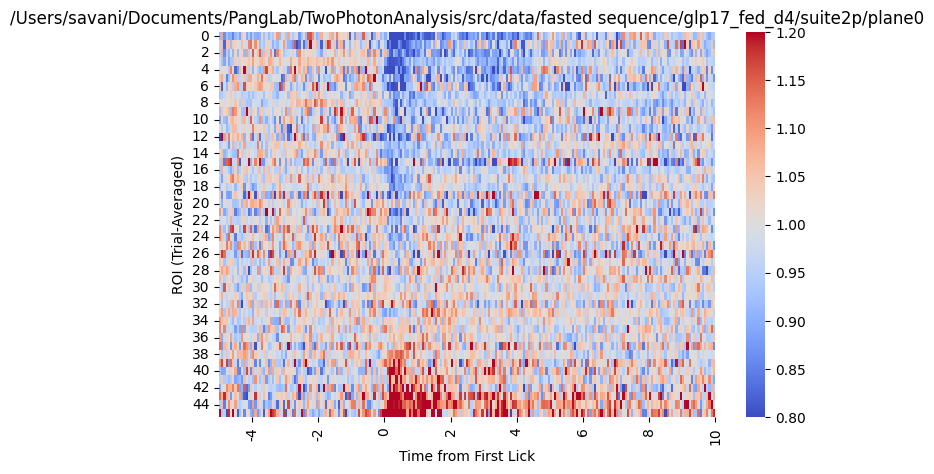

In [77]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='coolwarm')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")

ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/fasted 30 sucrose/glp17_fasted30suc_L150P800_565um-032/suite2p/plane0')

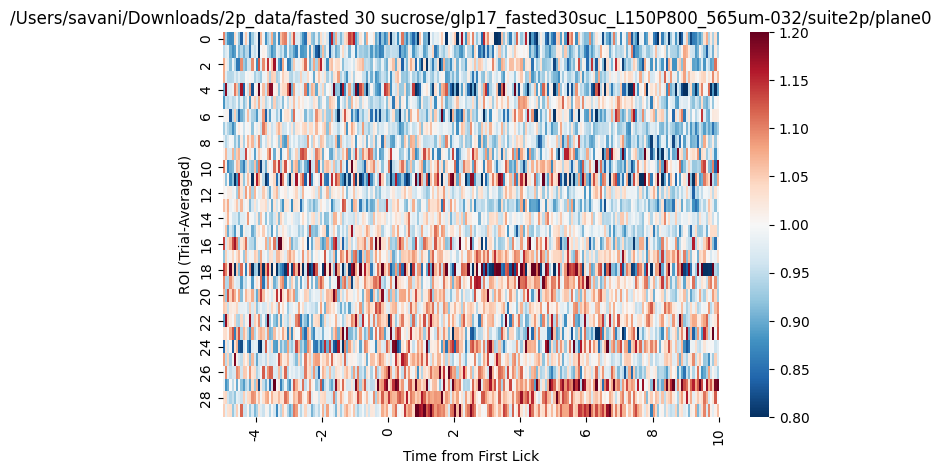

In [50]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='RdBu_r')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/fasted 30 sucrose/glp17_fasted30suc_L150P800_565um-032/suite2p/plane0')

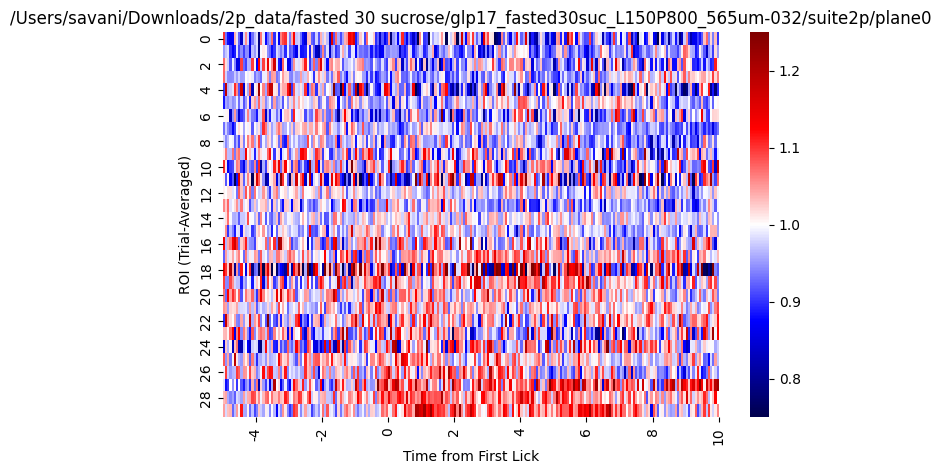

In [51]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.75, vmax=1.25, cmap='seismic')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/fasted 30 sucrose/glp6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

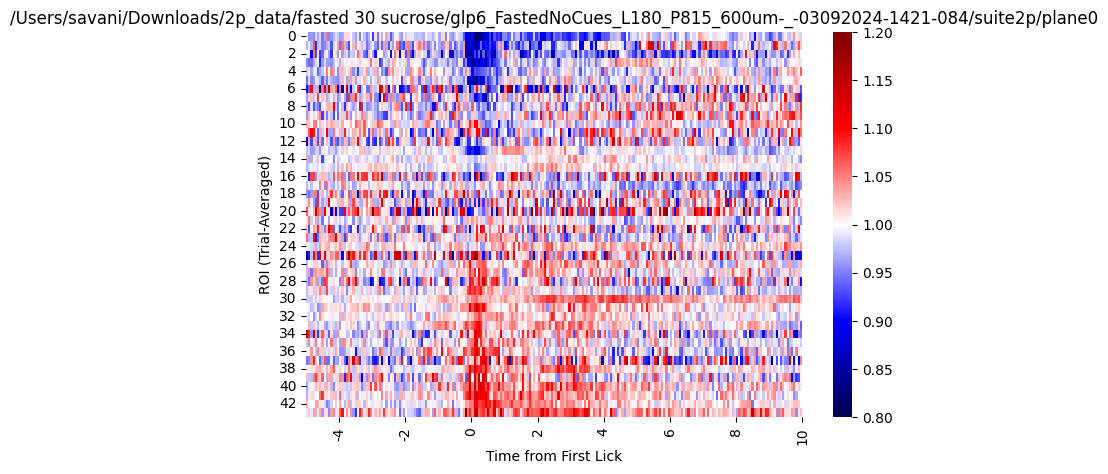

In [24]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
cm = Colormap('seaborn:icefire').to_mpl()
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='seismic')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



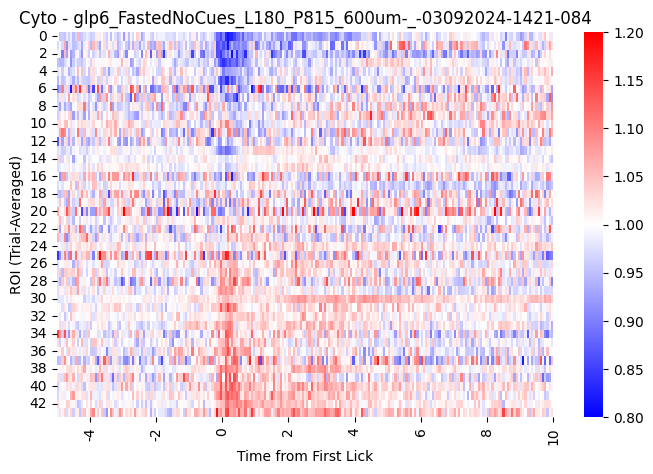

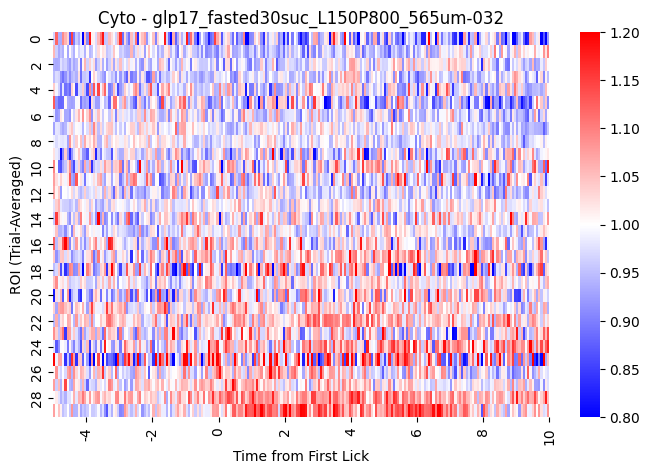

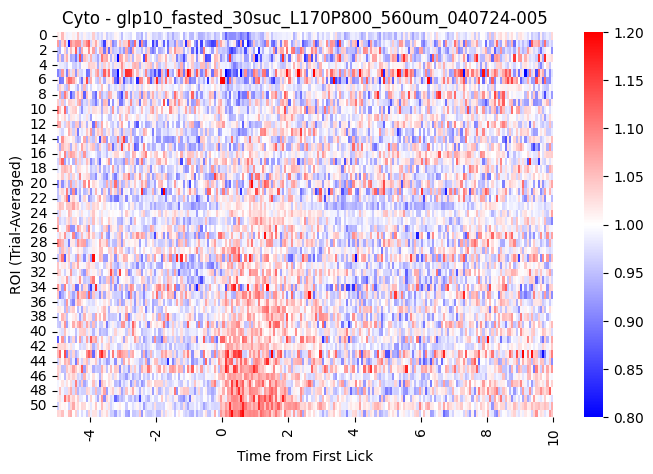

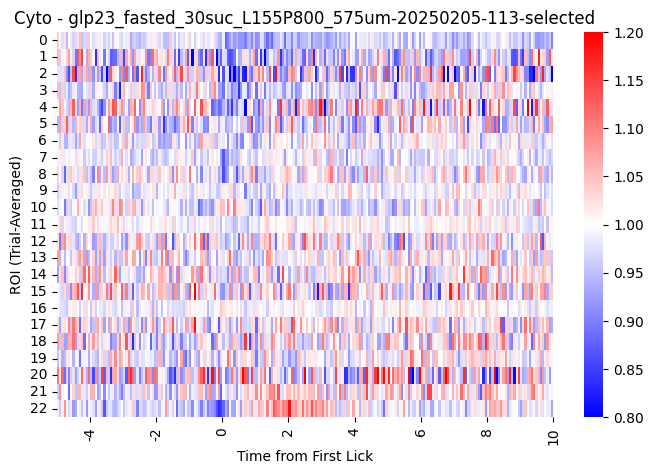

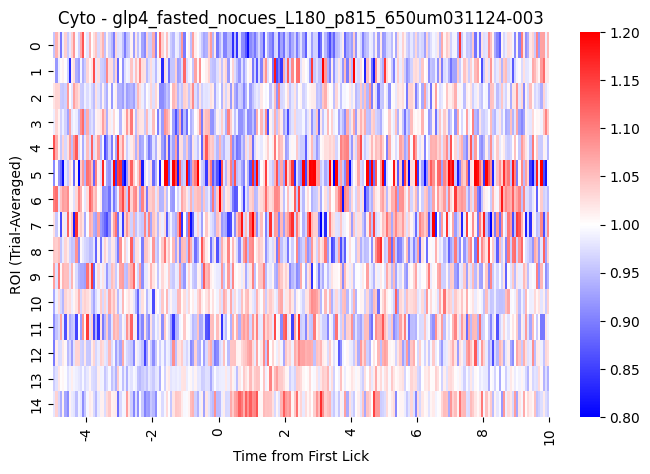

In [ ]:
folder = '/Users/savani/Downloads/2p_data/fasted 30 sucrose'
for subdir in [f for f in os.listdir(folder) if not f.startswith('.')]:
    matpath = os.path.join(folder, subdir, 'suite2p', 'plane0', 'behaviordata.mat')
    cyto_suite = os.path.join(folder, subdir, 'suite2p', 'plane0')
    manual_suite = os.path.join(folder, subdir, 'suite2p_manual')

    # Make heatmap from cyto suite2p
    f, iscell, ops = p2p.load_s2p_data(cyto_suite)
    filt_f = p2p.filter_cells(f, iscell)
    filt_f_reshaped = p2p.reshape_data(filt_f)
    filt_f_norm = p2p.normalize_data(filt_f_reshaped)
    bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matpath)
    successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
    successful_bout_start_frames = bout_start_frames[successful_trial_idx]
    successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
    filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)
    avg_f_cyto = p2p.average_trials(filt_f_aligned)

    # # Make heatmap from manual suite2p
    # f, iscell, ops = p2p.load_s2p_data(manual_suite)
    # filt_f = p2p.filter_cells(f, iscell, filter_by = 'second')
    # filt_f_reshaped = p2p.reshape_data(filt_f)
    # filt_f_norm = p2p.normalize_data(filt_f_reshaped)
    # bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matpath)
    # successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
    # successful_bout_start_frames = bout_start_frames[successful_trial_idx]
    # successful_filt_f = filt_f_norm[:, successful_trial_idx, :]
    # filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)
    # avg_f_manual = p2p.average_trials(filt_f_aligned)


    fig, ax = plt.subplots(1, figsize=(8, 5))
    # fig, ax = plt.subplots(1, figsize=(8, 5))
    ascending_order = np.argsort(np.nanmean(avg_f_cyto[:, 75:105], axis=1))
    sorted_avg_mean = avg_f_cyto[ascending_order, :]
    sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
    ax.set_xticks(np.arange(15, 255, 15)[::2])
    ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax.set_ylabel("ROI (Trial-Averaged)")
    ax.set_xlabel("Time from First Lick")
    ax.set_title(f"Cyto - {subdir}")

    # ascending_order = np.argsort(np.nanmean(avg_f_manual[:, 75:105], axis=1))
    # sorted_avg_mean = avg_f_manual[ascending_order, :]
    # sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap='bwr')
    # ax2.set_xticks(np.arange(15, 255, 15)[::2])
    # ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    # ax2.set_ylabel("ROI (Trial-Averaged)")
    # ax2.set_xlabel("Time from First Lick")
    # ax2.set_title(f"Manual")
    # fig.tight_layout(w_pad=2.0)

    # fig.savefig(os.path.join(folder, subdir, 'suite2p', 'heatmap_pop.png'), dpi=300)
    



Text(-0.55, 0.96, 'First Lick')

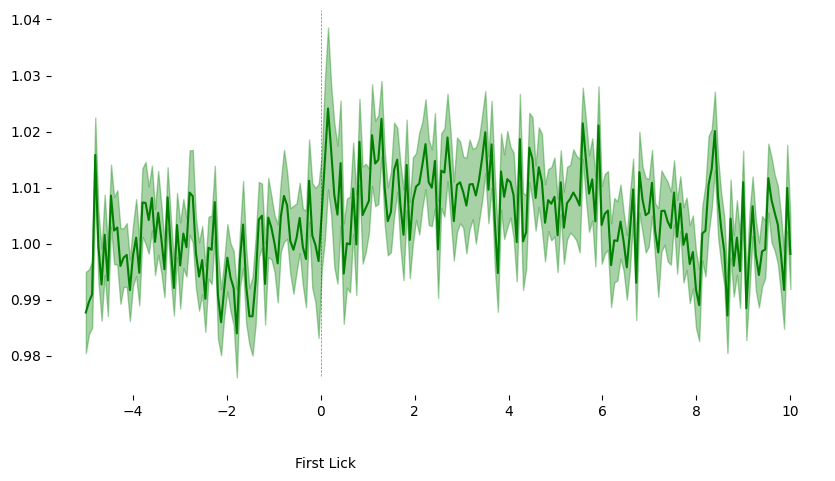

In [256]:
fig, ax = plt.subplots(1, figsize=(10, 5))
time = np.linspace(-5, 10, num=225)
avg_response = np.nanmean(avg_f, axis = 0)
sem_response = stats.sem(avg_f, axis = 0)
ax.plot(time, avg_response, color = 'green')
ax.fill_between(time, avg_response - sem_response, avg_response + sem_response, color = 'green', alpha = 0.35)
sns.despine(left=True, bottom=True)
# sb = add_scalebar(ax, matchx=False, sizex=5, labelx='5 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-0.55, 0.96, 'First Lick')

In [40]:
plt.close('all')

[19, 0]


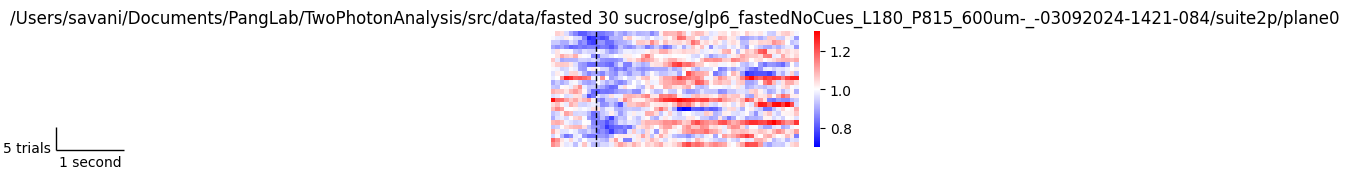

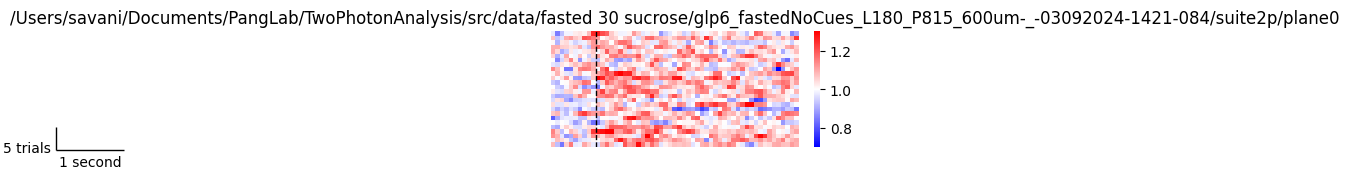

In [164]:
path = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose/glp6_fastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0'
matfile = os.path.join(path, 'behaviordata.mat')
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# Get baseline data
baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# Average across trials
avg_f = p2p.average_trials(filt_f_aligned)

ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
ascending_order = [19, 0]
filt_f_ordered = filt_f_aligned[ascending_order,:, :]
print(ascending_order)

for cell in range(filt_f_ordered.shape[0]):
    for k in range(filt_f_ordered.shape[1]):
        filt_f_ordered[cell, k, :] = p2p.moving_average(filt_f_ordered[cell, k, :], 2) 

    fig, ax = plt.subplots(1, figsize=(4, 1.5))
    sns.heatmap(filt_f_ordered[cell, :, :], ax = ax, vmin=0.7, vmax=1.3, cmap='bwr')
    ax.set_xticks(np.arange(15, 255, 15)[::2])
    ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax.set_ylabel("ROI (Trial-Averaged)")
    ax.set_xlabel("Time from First Lick")
    ax.set_title(f"{path}")
    ax.axvline(75, ymin=0.0, color='black', linewidth=1, linestyle='--', alpha=1)
    ax.set_xlim(left = 65, right = 120)
    sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 trials',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))
    # fig.savefig(os.path.join(folder, os.listdir(folder)[0], 'suite2p', 'plane0', f'heatmap_cell{cell}_zoomed.pdf'), dpi=300)


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#3a65c9", "#ffffff", "#383838"]
colors = ['#020202', '#ffffff', "#5b8cba" ]
colors = ['#020202', '#ffffff', "#316dc1" ]
colors = ['#020202', '#ffffff', "#316dc1" ]
# colors = ['#6588AD', '#ffffff', '#020202' ]
# colors = ['#020202', '#ffffff', "#455cc1" ]
# colors = ['#020202', '#ffffff', "#423cbe" ]
# colors = ['#020202', '#ffffff', '#6ea2d8' ]



custom_cmap = LinearSegmentedColormap.from_list("custom_bwblue", colors, N=256)

[19, 0, 11, 20, 25, 28, 32]


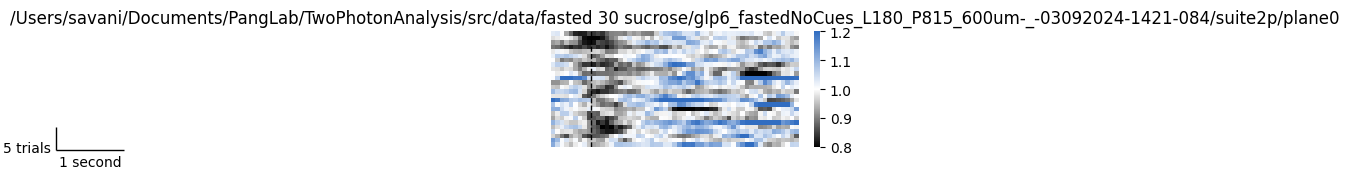

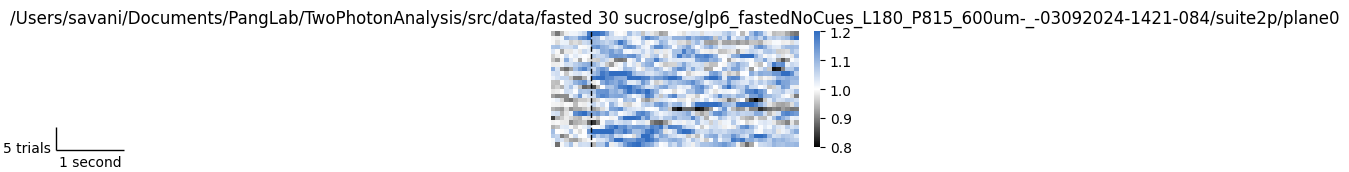

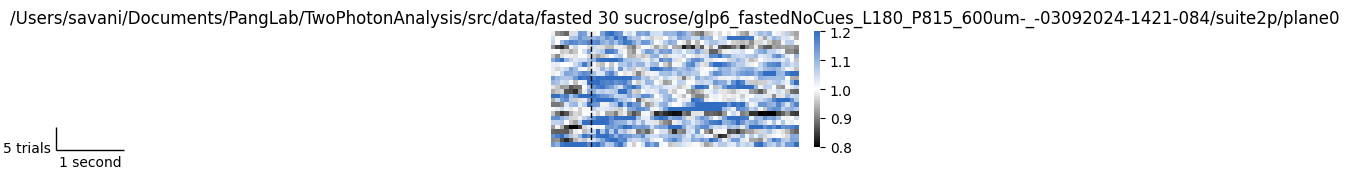

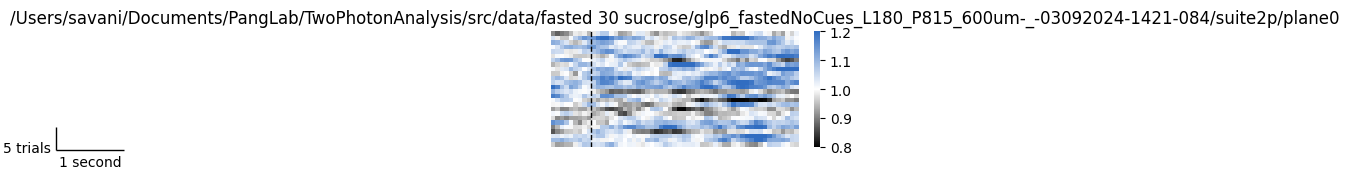

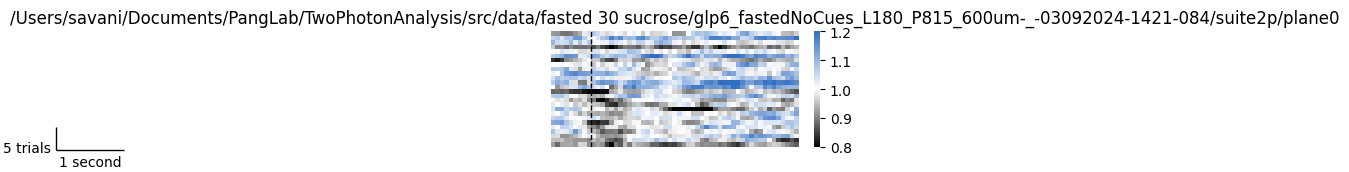

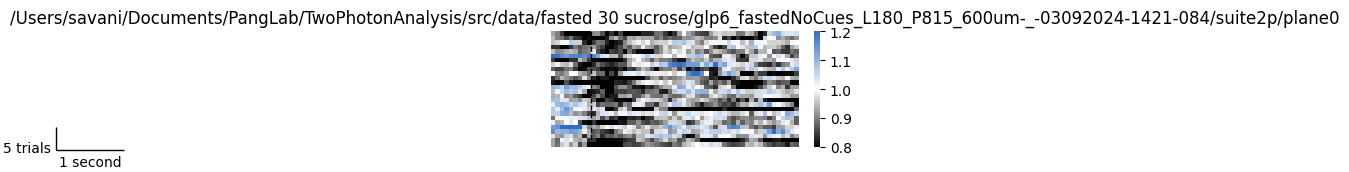

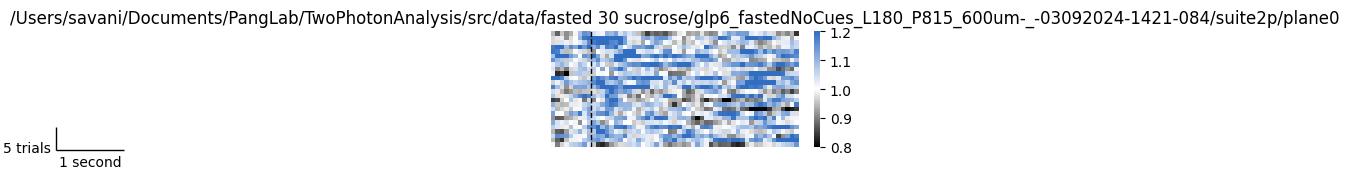

In [240]:
folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose/glp6_fastedNoCues_L180_P815_600um-_-03092024-1421-084'
# path = os.path.join(folder, os.listdir(folder)[0], 'suitwe2p', 'plane0')
path = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose/glp6_fastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0'

# path = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p_manual'
matfile = os.path.join(path, 'behaviordata.mat')
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# Get baseline data
baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# Average across trials
avg_f = p2p.average_trials(filt_f_aligned)

ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
ascending_order = [19, 0]
ascending_order = [19, 0, 11, 20, 25, 28, 32]
filt_f_ordered = filt_f_aligned[ascending_order,:, :]
print(ascending_order)

for cell in range(filt_f_ordered.shape[0]):
    for k in range(filt_f_ordered.shape[1]):
        filt_f_ordered[cell, k, :] = p2p.moving_average(filt_f_ordered[cell, k, :], 3) 

    fig, ax = plt.subplots(1, figsize=(4, 1.5))
    sns.heatmap(filt_f_ordered[cell, :, :], ax = ax, vmin=0.8, vmax=1.2, cmap=custom_cmap)
    ax.set_xticks(np.arange(15, 255, 15)[::2])
    ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax.set_ylabel("ROI (Trial-Averaged)")
    ax.set_xlabel("Time from First Lick")
    ax.set_title(f"{path}")
    ax.axvline(74, ymin=0.0, color='black', linewidth=1, linestyle='--', alpha=1)
    ax.set_xlim(left = 65, right = 120)
    sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 trials',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))
    fig.savefig(os.path.join(folder, 'suite2p', 'plane0', f'heatmap_cell{cell}_zoomed.pdf'), dpi=300)


In [ ]:
folder =  '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence'
path = os.path.join(folder, os.listdir(folder)[11], 'suite2p', 'plane0')
print(path)
# path = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p_manual'
matfile = os.path.join(path, 'behaviordata.mat')
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f, n_trials = 30)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
print(bout_start)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# Get baseline data
baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# Average across trials
avg_f = p2p.average_trials(filt_f_aligned)

In [ ]:
path = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted 30 sucrose/glp6_fastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0'

matfile = os.path.join(path, 'behaviordata.mat')
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f, n_trials = 30)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
print(bout_start)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
# filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# # Get baseline data
# baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# # Average across trials
# avg_f = p2p.average_trials(filt_f_aligned)

n_cells = successful_filt_f.shape[0]
successful_filt_f_expanded = successful_filt_f.reshape(n_cells, -1)

[4291 1000    0 3127  648 3055 3522 4295 1811 1614  406  299 2644 4394
 3358 2235 4669 3034    0 3151 1439    0  527  542 1612 4183  931  698
 1905    0]


In [ ]:
np.where(iscell[:, 0] == 1)[0][25]




np.int64(28)

In [165]:
for x in [0, 11, 19, 20, 25, 28, 32]:
    print(np.where(iscell[:, 0] == 1)[0][x])


0
12
24
25
30
33
37


In [266]:
successful_filt_f_expanded.shape

(44, 9750)

0
11
19
20
25
28
32
0
11
19
20
25
28
32
0
11
19
20
25
28
32
0
11
19
20
25
28
32
0
11
19
20
25
28
32


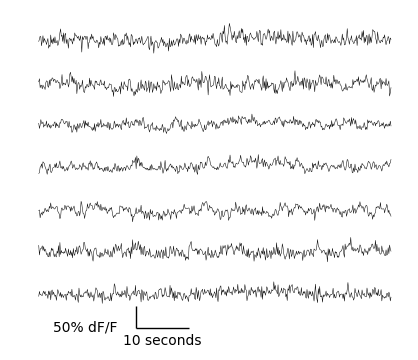

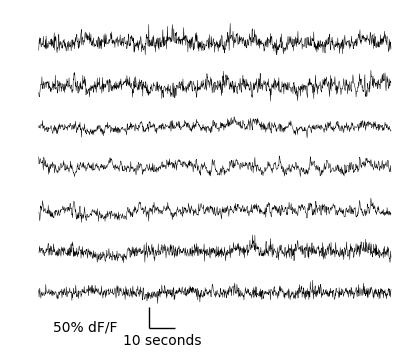

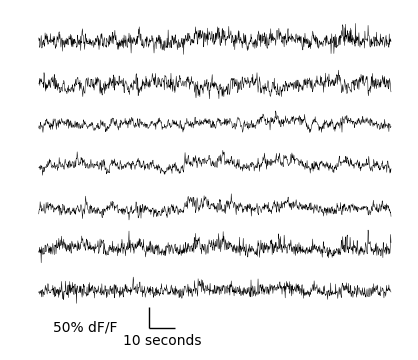

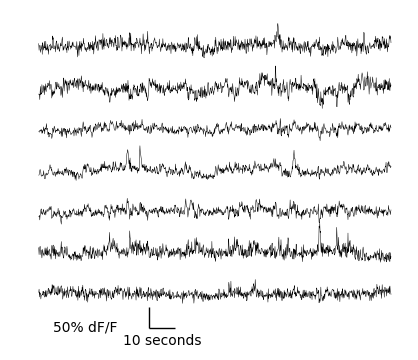

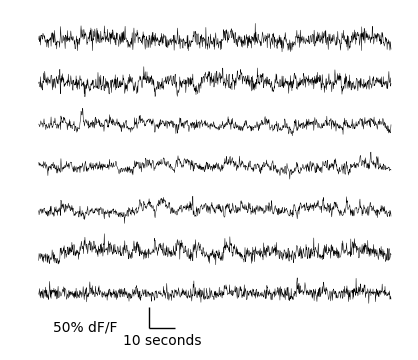

In [268]:
block = np.random.randint(0, n_cells, size = 5)

c = 0 

for t in [[0, 1000], [1000, 3000], [3000, 5000], [5000, 7000], [7000, 9000]]:
    fig, ax = plt.subplots(figsize = (5, 4))
    for cell in range(n_cells): 
        # if cell in range(10, 20):
        if cell in [0, 11, 19, 20, 25, 28, 32]:
            print(cell)
            data = p2p.moving_average(successful_filt_f_expanded[cell, :], 2)
            data = data[t[0]:t[1]]
            data = data[::2]
            ax.plot(data + c, c = 'black', lw = 0.35)
            c += 1
    # ax.set_xlim(left = 2000, right = 8000)
    sb = add_scalebar(ax, matchx=False, sizex=10*7.5, labelx='10 seconds', matchy=False, sep=4, sizey=0.5, labely='50% dF/F',loc='lower left', bbox_to_anchor=(50, 10, 0.1, 0.4))
    # plt.savefig(f'/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/2p/2p representative/glp6_fasted_transients_{t}.pdf')

array([ 6, 27, 26, 33, 29])